In [15]:
print(1)

1


In [14]:
import pandas as pd
import os
import json
import re

# Define the directory containing the JSON files
data_dir = '/home/xutingz/workspace/bench/sglang_bench/045tp16_disable_radix/'

# Regular expression to parse the filename
# Example: tp8n512isl1024osl8c8_run1.json
filename_pattern = re.compile(r'tp(\d+)n(\d+)isl(\d+)osl(\d+)c(\d+)_run(\d+)\.json')

all_data = []

# Iterate through files in the directory
print(f"Looking for JSON files in: {data_dir}")
if not os.path.isdir(data_dir):
    print(f"Error: Directory not found: {data_dir}")
else:
    files_found = 0
    for filename in os.listdir(data_dir):
        if filename.endswith('.json'):
            files_found += 1
            match = filename_pattern.match(filename)
            if match:
                # Extract parameters from filename
                try:
                    tp, n, isl, osl, c, run = map(int, match.groups())
                except ValueError:
                     print(f"Error converting filename parts to int for: {filename}")
                     continue # Skip this file

                # Construct the full file path
                file_path = os.path.join(data_dir, filename)

                try:
                    # Read the JSON data from the file
                    with open(file_path, 'r') as f:
                        json_data = json.load(f)

                    # Create a record dictionary
                    record = {
                        'filename': filename,
                        'tp': tp,
                        'n': n,
                        'isl': isl,
                        'osl': osl,
                        'c': c,
                        'run': run
                    }

                    # Add the JSON data to the record
                    # Handle potential key collisions if JSON has same keys as filename parts
                    for key, value in json_data.items():
                        if key not in record:
                            record[key] = value
                        else:
                            # Example: prefix json keys like 'json_key'
                            record[f"json_{key}"] = value


                    # Append the record to the list
                    all_data.append(record)
                except json.JSONDecodeError:
                    print(f"Error decoding JSON from file: {filename}")
                except Exception as e:
                    print(f"Error processing file {filename}: {e}")
            else:
                print(f"Filename format mismatch: {filename}")

    if files_found == 0:
        print("No JSON files found in the directory.")
    elif not all_data:
         print("Found JSON files, but encountered errors during processing or format mismatch for all files.")


# Create a Pandas DataFrame if data was collected
if all_data:
    df = pd.DataFrame(all_data)
    print(f"Successfully created DataFrame with {len(df)} rows.")
    # Display the first few rows
    display(df.head()) # Use display() in Jupyter
else:
    print("No data was successfully processed to create a DataFrame.")


Looking for JSON files in: /home/xutingz/workspace/bench/sglang_bench/045tp16_disable_radix/
Successfully created DataFrame with 170 rows.


,filename,tp,n,isl,osl,c,run,backend,dataset_name,request_rate,...,median_tpot_ms,std_tpot_ms,p99_tpot_ms,mean_itl_ms,median_itl_ms,std_itl_ms,p95_itl_ms,p99_itl_ms,concurrency,accept_length
0,tp16n512isl2048osl8c8_run2.json,16,512,2048,8,8,2,sglang,random,inf,...,45.139774,27.757533,112.068376,64.835544,44.350080,85.831830,404.220728,406.698494,7.992335,None
1,tp16n512isl1024osl1024c16_run1.json,16,512,1024,1024,16,1,sglang,random,inf,...,57.959134,0.598213,58.739687,57.808167,57.617753,9.082059,59.529396,60.255520,15.998433,None
2,tp16n512isl2048osl8c8_run4.json,16,512,2048,8,8,4,sglang,random,inf,...,45.047430,26.660980,112.044950,64.721399,44.315274,84.768359,404.573067,406.501061,7.992242,None
3,tp16n512isl1024osl64c8_run2.json,16,512,1024,64,8,2,sglang,random,inf,...,43.694517,0.495806,43.871136,43.722537,43.628575,3.854127,44.654850,46.588465,7.995773,None
4,tp16n512isl1024osl8c8_run2.json,16,512,1024,8,8,2,sglang,random,inf,...,44.040572,4.380983,44.490874,44.286899,43.667990,11.501887,46.951300,47.980295,7.987993,None


In [7]:
df_run4 = df[df['run'] == 4]

Found 5 unique (isl, c) combinations to plot.
Generating plots for isl=2048, c=8
  Found TPOT at OSL=1024: 44.81 ms


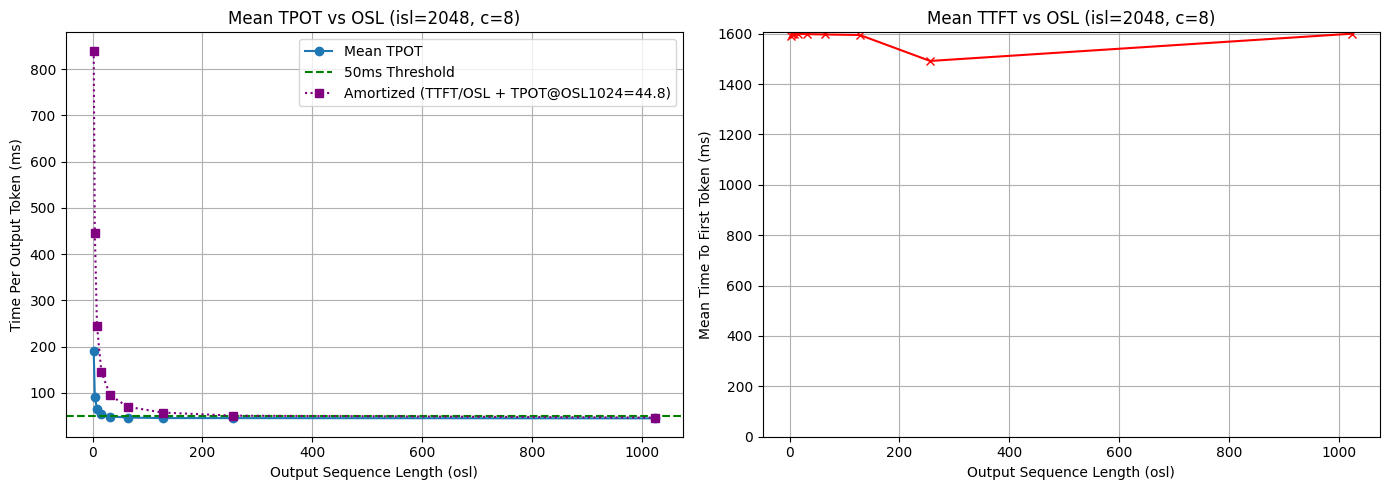

Generating plots for isl=1024, c=16
  Found TPOT at OSL=1024: 57.79 ms


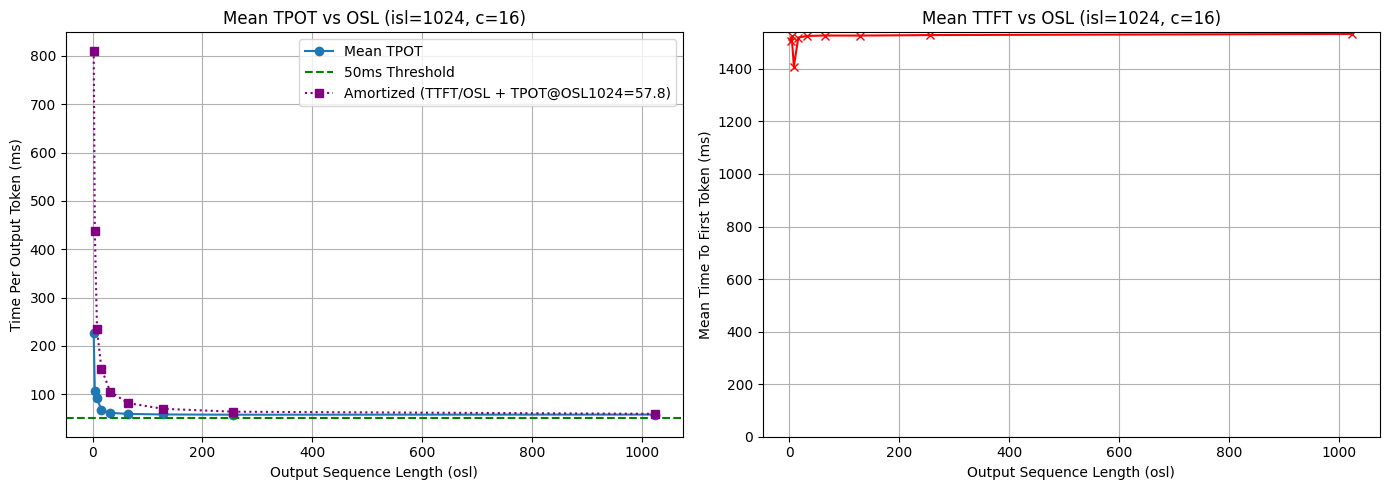

Generating plots for isl=1024, c=32
  Found TPOT at OSL=1024: 67.32 ms


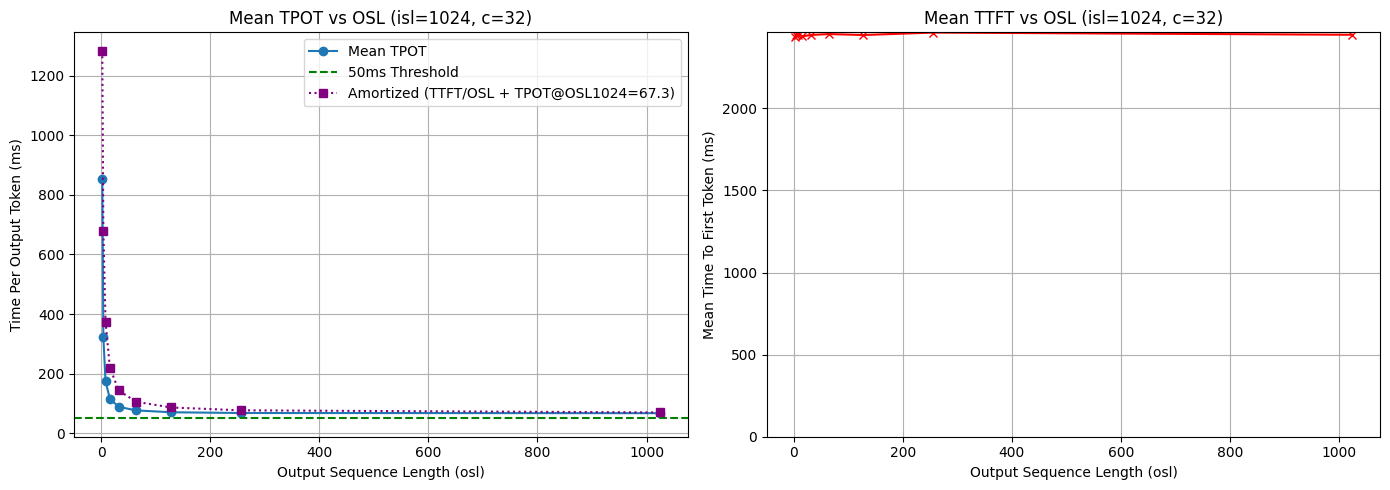

Generating plots for isl=1024, c=64
  Found TPOT at OSL=1024: 84.81 ms


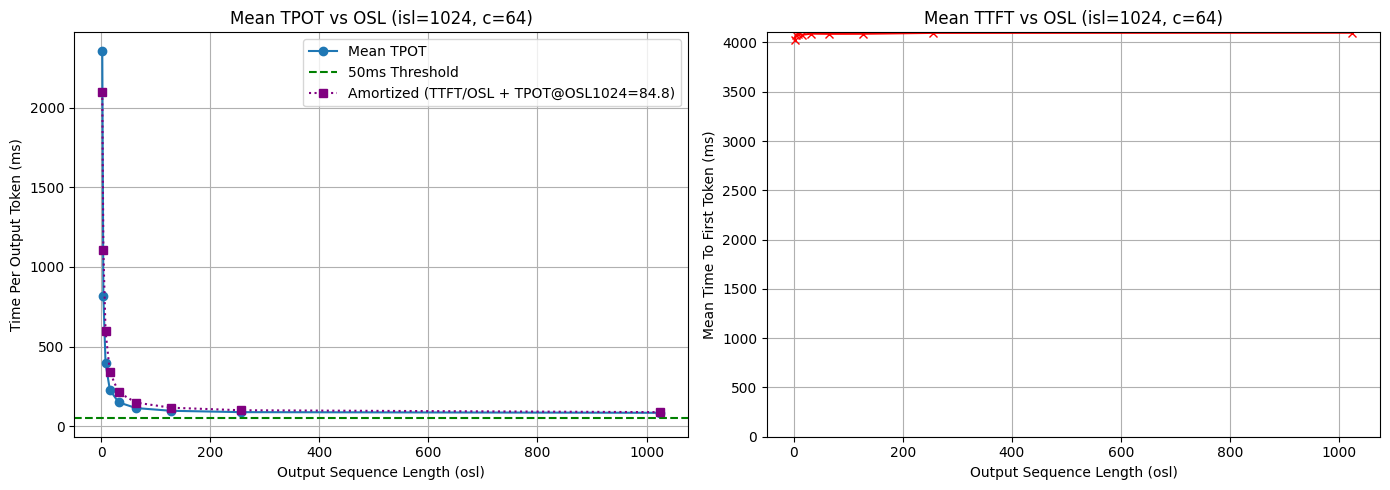

Generating plots for isl=1024, c=8


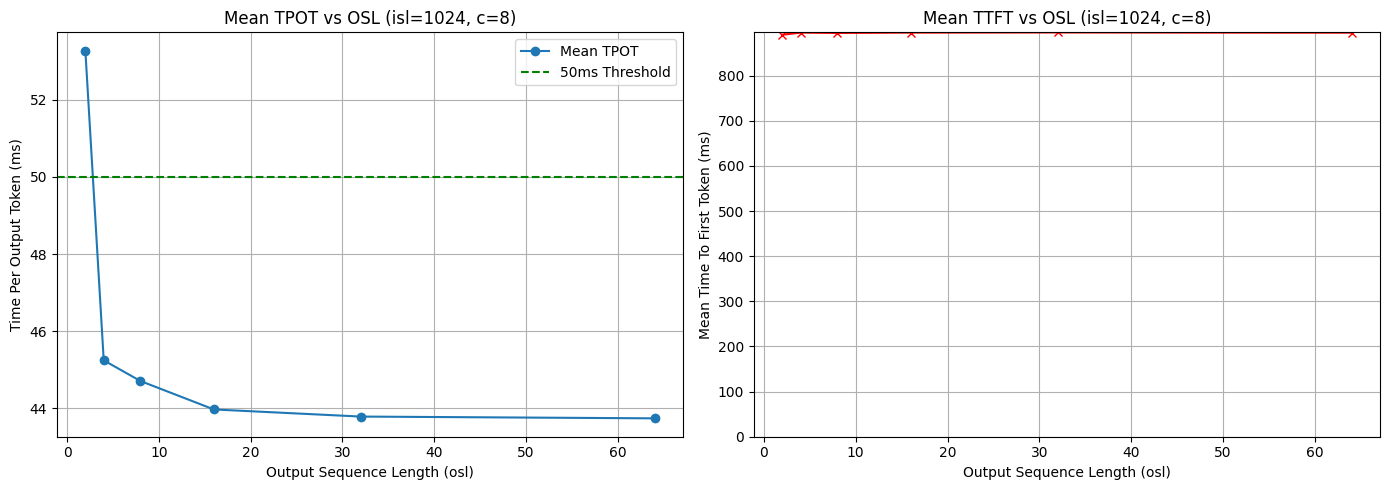

Finished generating plots.


In [19]:
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported if not already in the cell
import numpy as np # Import numpy for safe division

# Make sure df_run4 exists (should be defined from a previous cell)
if 'df_run4' not in locals():
    print("Error: DataFrame 'df_run4' not found. Please run the cell that defines df_run4 first.")
else:
    # Get unique combinations of 'isl' and 'c'
    combinations = df_run4[['isl', 'c']].drop_duplicates()
    print(f"Found {len(combinations)} unique (isl, c) combinations to plot.")

    if combinations.empty:
        print("No data in df_run4 to plot.")
    else:
        for index, combo in combinations.iterrows():
            isl_val = combo['isl']
            c_val = combo['c']

            # Filter data for the current combination
            df_combo = df_run4[(df_run4['isl'] == isl_val) & (df_run4['c'] == c_val)].copy()

            # Sort by 'osl' for meaningful line plots
            df_combo.sort_values('osl', inplace=True)

            if len(df_combo) < 1:
                print(f"Skipping plot for isl={isl_val}, c={c_val}: Not enough data points (found {len(df_combo)}).")
                continue

            print(f"Generating plots for isl={isl_val}, c={c_val}")

            # --- Modification starts here ---
            # Find the mean_tpot_ms value where osl == 1024 for this group
            tpot_1024_row = df_combo[df_combo['osl'] == 1024]
            tpot_at_1024 = None
            if not tpot_1024_row.empty:
                # Take the first value if multiple runs exist for osl=1024
                tpot_at_1024 = tpot_1024_row['mean_tpot_ms'].iloc[0]
                print(f"  Found TPOT at OSL=1024: {tpot_at_1024:.2f} ms")
            else:
                print(f"  Warning: No data point found for OSL=1024 for isl={isl_val}, c={c_val}. Skipping 'Amortized (Fixed TPOT)' line.")

            # Calculate the new metric only if tpot_at_1024 was found
            amortized_tpot_fixed = None
            if tpot_at_1024 is not None:
                # Avoid division by zero if osl is 0
                osl_safe = df_combo['osl'].replace(0, np.nan) # Replace 0 with NaN
                amortized_tpot_fixed = df_combo['mean_ttft_ms'] / osl_safe + tpot_at_1024
            # --- Modification ends here ---


            fig, axes = plt.subplots(1, 2, figsize=(14, 5)) # Create a figure with 1 row, 2 columns

            # Plot 1: mean_tpot_ms vs osl
            axes[0].plot(df_combo['osl'], df_combo['mean_tpot_ms'], marker='o', linestyle='-', label='Mean TPOT')
            axes[0].axhline(y=50, color='g', linestyle='--', label='50ms Threshold')
            # Plot the new line only if data was available
            if amortized_tpot_fixed is not None:
                 axes[0].plot(df_combo['osl'], amortized_tpot_fixed, marker='s', linestyle=':', color='purple', label=f'Amortized (TTFT/OSL + TPOT@OSL1024={tpot_at_1024:.1f})')

            axes[0].set_title(f'Mean TPOT vs OSL (isl={isl_val}, c={c_val})')
            axes[0].set_xlabel('Output Sequence Length (osl)')
            axes[0].set_ylabel('Time Per Output Token (ms)')
            axes[0].grid(True)
            axes[0].legend() # Display the legend to identify lines


            # Plot 2: mean_ttft_ms vs osl
            if len(df_combo) >= 2:
                axes[1].plot(df_combo['osl'], df_combo['mean_ttft_ms'], marker='x', linestyle='-', color='r')
            else:
                 axes[1].scatter(df_combo['osl'], df_combo['mean_ttft_ms'], marker='x', color='r')
            axes[1].set_title(f'Mean TTFT vs OSL (isl={isl_val}, c={c_val})')
            axes[1].set_xlabel('Output Sequence Length (osl)')
            axes[1].set_ylabel('Mean Time To First Token (ms)')
            axes[1].set_ylim(bottom=0) # Set y-axis to start from 0
            axes[1].grid(True)


            plt.tight_layout() # Adjust layout to prevent overlap
            plt.show() # Display the plot for the current combination

        print("Finished generating plots.")